#Employee Burnout Prediction

In [2]:
import pandas as pd

In [3]:
data=pd.read_excel(r'C:\Users\sajid\Downloads\employee_burnout_analysis-AI.xlsx')

In [4]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [5]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data['Resource Allocation']=imputer.fit_transform(data[['Resource Allocation']])
data['Resource Allocation']

0        3.0
1        2.0
2        4.0
3        1.0
4        7.0
        ... 
22745    3.0
22746    6.0
22747    7.0
22748    5.0
22749    6.0
Name: Resource Allocation, Length: 22750, dtype: float64

In [7]:
data=data.dropna()

In [8]:
data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [9]:
data['Designation'].value_counts()

Designation
2    6599
3    5180
1    4201
4    2055
0    1309
5     337
Name: count, dtype: int64

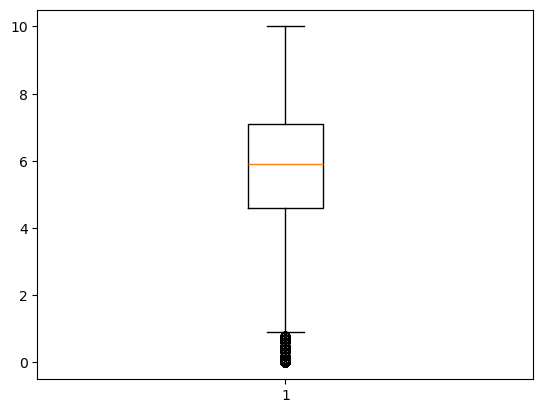

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(data['Mental Fatigue Score'])
plt.show()

In [11]:
data=data[(data['Mental Fatigue Score']>1.5)]

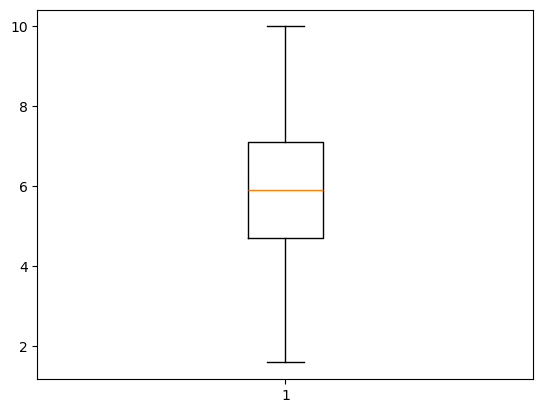

In [12]:
plt.boxplot(data['Mental Fatigue Score'])
plt.show()

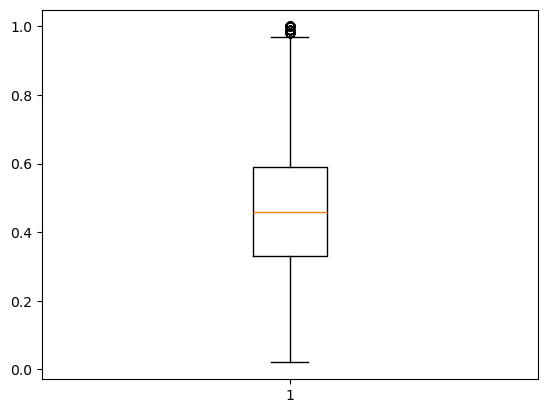

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(data['Burn Rate'])
plt.show()

In [14]:
data=data[(data['Burn Rate']<=0.9)]

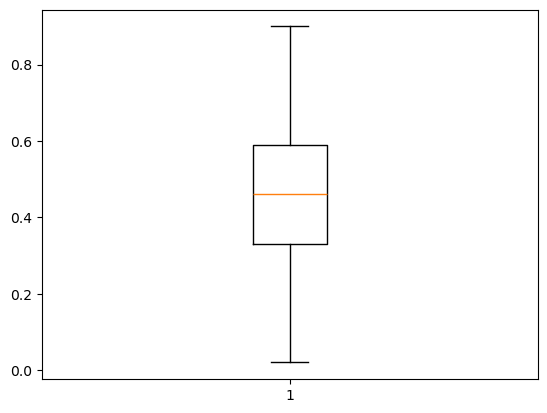

In [15]:
plt.boxplot(data['Burn Rate'])
plt.show()

In [16]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22743,fffe3300390030003600,2008-12-15,Female,Product,Yes,1,3.0,6.0,0.48
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [17]:
data.shape

(18892, 9)

In [18]:
data=data.drop(columns=['Employee ID','Date of Joining'])

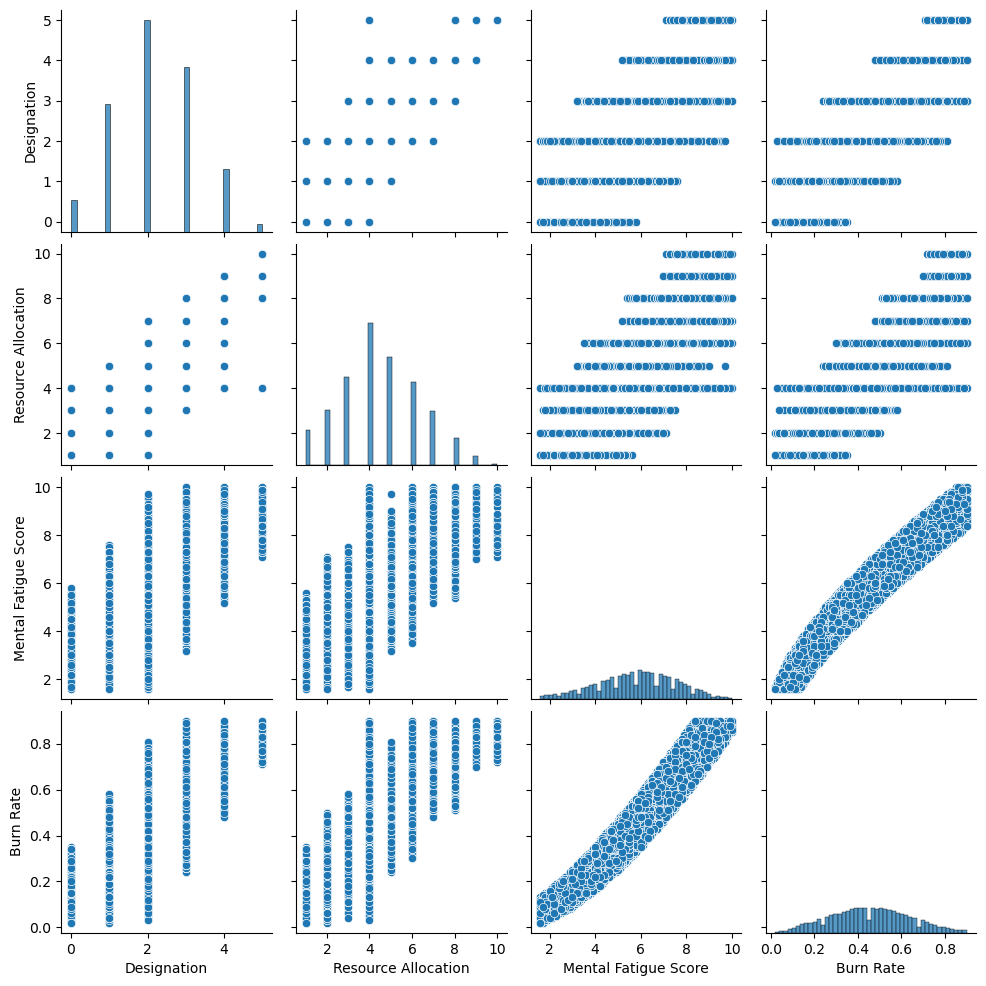

In [19]:
import warnings
import seaborn as sns
# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress specific warnings, e.g., FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(data)
plt.show()

<Axes: >

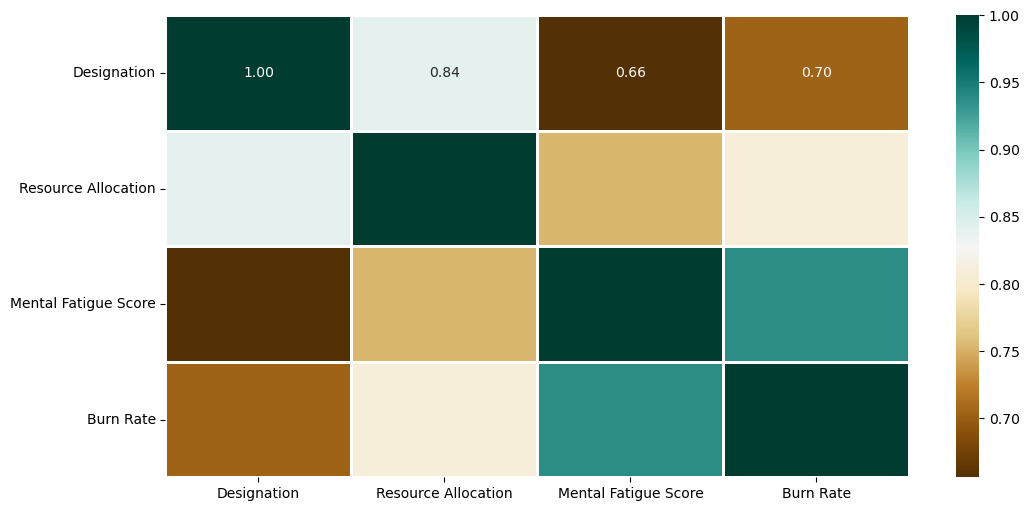

In [20]:
import numpy as np
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [21]:
'''
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Date of Joining']=encoder.fit_transform(data['Date of Joining'])
data['Gender']=encoder.fit_transform(data['Gender'])
data['Company Type']=encoder.fit_transform(data['Company Type'])
data['WFH Setup Available']=encoder.fit_transform(data['WFH Setup Available'])
'''
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)

In [22]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
2,2,4.0,5.8,0.49,False,True,False
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,True,False
22744,3,7.0,6.2,0.54,False,False,True
22746,3,6.0,6.7,0.59,False,True,False
22748,2,5.0,5.9,0.52,True,False,False


In [23]:
x=data.drop(columns=['Burn Rate'])
x

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,True,False,False
1,1,2.0,5.0,True,True,True
2,2,4.0,5.8,False,True,False
3,1,1.0,2.6,True,True,True
4,3,7.0,6.9,True,False,False
...,...,...,...,...,...,...
22743,1,3.0,6.0,False,True,False
22744,3,7.0,6.2,False,False,True
22746,3,6.0,6.7,False,True,False
22748,2,5.0,5.9,True,False,False


In [24]:
y=data['Burn Rate']
y

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22743    0.48
22744    0.54
22746    0.59
22748    0.52
22749    0.61
Name: Burn Rate, Length: 18892, dtype: float64

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.4       , 0.22222222, 0.26190476, 1.        , 0.        ,
        0.        ],
       [0.2       , 0.11111111, 0.4047619 , 1.        , 1.        ,
        1.        ],
       [0.4       , 0.33333333, 0.5       , 0.        , 1.        ,
        0.        ],
       ...,
       [0.6       , 0.55555556, 0.60714286, 0.        , 1.        ,
        0.        ],
       [0.4       , 0.44444444, 0.51190476, 1.        , 0.        ,
        0.        ],
       [0.6       , 0.55555556, 0.73809524, 0.        , 0.        ,
        1.        ]])

In [26]:
#Train-Test-Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [27]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knrmodel = KNeighborsRegressor(n_neighbors=5)
knrmodel.fit(x_train,y_train)

KNeighborsRegressor()

In [28]:
predict=knrmodel.predict(x_test)
predict

array([0.278, 0.322, 0.268, ..., 0.202, 0.464, 0.784])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.046531886742524474
Mean Squared Error (MSE): 0.003398664196877481
R-squared (R2): 0.8981830933696326


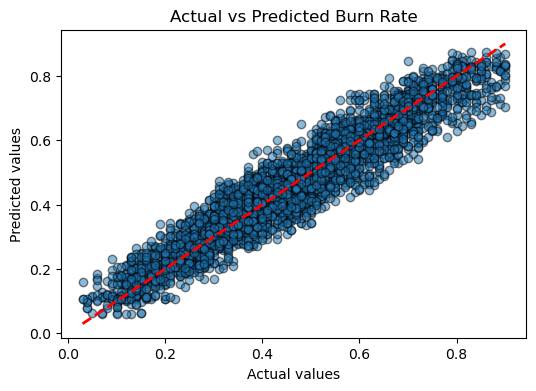

In [30]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, predict, alpha=0.5, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Burn Rate')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
predict2=lr.predict(x_test)
predict2

array([0.29743004, 0.36865534, 0.22974437, ..., 0.17835578, 0.49962916,
       0.70014271])

In [33]:
mae = mean_absolute_error(y_test, predict2)
mse = mean_squared_error(y_test, predict2)
r2 = r2_score(y_test, predict2)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.045773653662331375
Mean Squared Error (MSE): 0.0031244260299103654
R-squared (R2): 0.9063986981552502


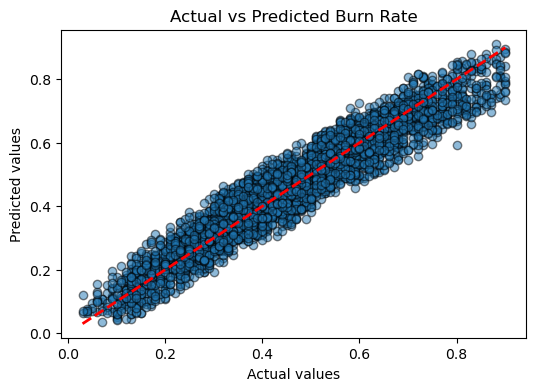

In [34]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, predict2, alpha=0.5, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Burn Rate')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()